In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import kstest, norm

In [5]:
matriculados = pd.read_csv("/home/willgm/STUFF/UNAL/7sem/Analisis BBDD/Proyecto-ABD-2024-2/Matriculados_mod1.csv")
aspirantes = pd.read_csv("/home/willgm/STUFF/UNAL/7sem/Analisis BBDD/Proyecto-ABD-2024-2/Aspirantes.csv")

In [13]:
att_comunes = np.intersect1d(matriculados.columns, aspirantes.columns)
att_comunes

array(['AREAC_SNIES', 'AREA_CINE', 'CA_CINE', 'CD_CINE', 'CIU_NAC',
       'CODS_NAC', 'DEP_NAC', 'EDAD', 'ESTRATO', 'LAT_CIU_NAC',
       'LON_CIU_NAC', 'NACIONALIDAD', 'NIVEL', 'PAES', 'PEAMA',
       'PROGRAMA', 'SEMESTRE', 'SEXO', 'SNIES_PROGRA', 'TIPO_NIVEL',
       'YEAR'], dtype=object)

In [14]:
att_Numcomunes = np.intersect1d(matriculados.select_dtypes(include=['number']).columns, aspirantes.select_dtypes(include=['number']).columns)
att_Numcomunes

array(['CA_CINE', 'CD_CINE', 'EDAD', 'LAT_CIU_NAC', 'LON_CIU_NAC',
       'SEMESTRE', 'SNIES_PROGRA', 'YEAR'], dtype=object)

In [16]:
att_NoNumcomunes = np.intersect1d(matriculados.select_dtypes(exclude=['number']).columns, aspirantes.select_dtypes(exclude=['number']).columns)
att_NoNumcomunes

array(['AREAC_SNIES', 'AREA_CINE', 'CIU_NAC', 'CODS_NAC', 'DEP_NAC',
       'ESTRATO', 'NACIONALIDAD', 'NIVEL', 'PAES', 'PEAMA', 'PROGRAMA',
       'SEXO', 'TIPO_NIVEL'], dtype=object)

+ mejorar analisis de atributos en comun
+ verificar que significa year en cada uno y como se puede usar

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

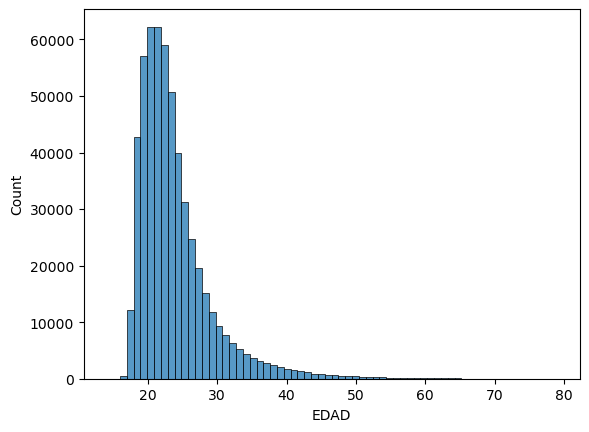

In [40]:
sns.histplot(data=matriculados,x="EDAD",bins=np.ptp(matriculados['EDAD'])+1)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

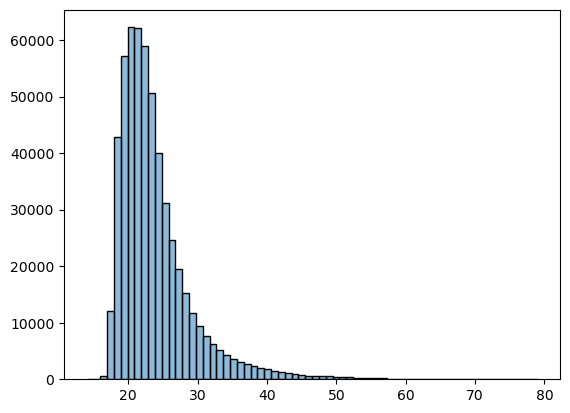

In [8]:
sns.histplot(data=matriculados["EDAD"],bins=np.ptp(matriculados['EDAD'])+1,kde=True)

In [31]:
edadAsp = aspirantes[aspirantes["EDAD"]>0]

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

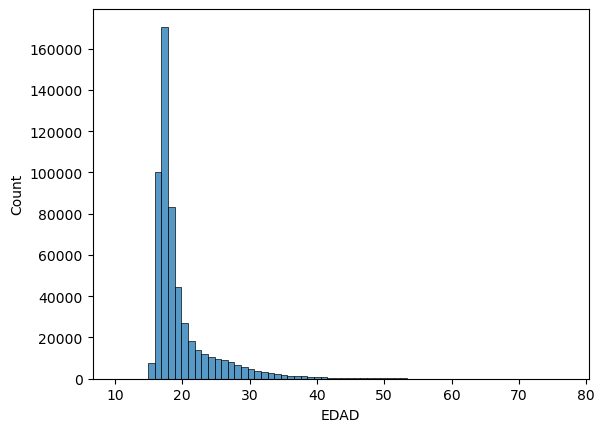

In [32]:
sns.histplot(data=edadAsp,x="EDAD",bins=np.ptp(edadAsp['EDAD'])+1)

<AxesSubplot:xlabel='EDAD'>

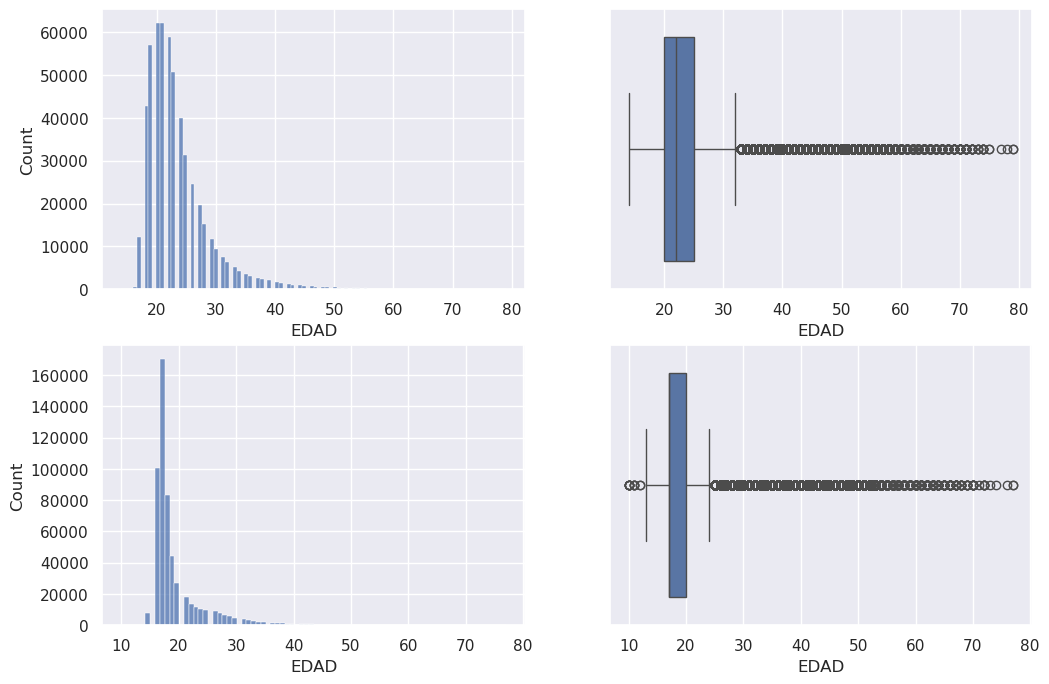

In [42]:
fig, axes = plt.subplots(2,2,figsize=(12, 8))


sns.histplot(data=matriculados,x="EDAD",bins=100,ax=axes[0,0])
sns.histplot(data=aspirantes[aspirantes["EDAD"]>0],x="EDAD",bins=80,ax=axes[1,0])

sns.boxplot(data=matriculados,x="EDAD",ax=axes[0,1])
sns.boxplot(data=aspirantes[aspirantes["EDAD"]>0],x="EDAD",ax=axes[1,1])

In [35]:
for i in matriculados["EDAD"]:
    print(i,end=', ')

46, 27, 29, 24, 24, 24, 21, 21, 23, 24, 24, 22, 30, 30, 25, 22, 37, 25, 28, 33, 28, 27, 30, 22, 24, 23, 26, 25, 25, 27, 22, 22, 24, 23, 26, 29, 22, 30, 24, 23, 24, 28, 23, 22, 24, 22, 23, 31, 26, 25, 25, 24, 29, 32, 27, 29, 23, 23, 23, 26, 23, 24, 26, 25, 23, 25, 22, 23, 24, 22, 26, 25, 25, 26, 22, 20, 24, 25, 22, 31, 21, 24, 25, 27, 26, 23, 25, 23, 25, 30, 26, 27, 29, 22, 20, 36, 25, 25, 24, 24, 22, 29, 26, 22, 30, 26, 25, 27, 26, 24, 25, 23, 27, 29, 23, 24, 25, 24, 24, 27, 24, 24, 23, 23, 25, 28, 29, 22, 24, 24, 23, 25, 24, 25, 26, 24, 25, 25, 33, 26, 23, 26, 23, 28, 27, 24, 24, 21, 24, 40, 24, 24, 28, 32, 26, 23, 24, 22, 30, 22, 22, 25, 27, 21, 22, 28, 21, 25, 23, 24, 22, 46, 39, 21, 27, 24, 34, 25, 23, 24, 23, 23, 21, 23, 24, 22, 26, 22, 21, 25, 22, 25, 23, 23, 24, 22, 24, 24, 26, 23, 26, 25, 22, 23, 22, 28, 23, 24, 24, 23, 24, 24, 29, 27, 22, 23, 25, 29, 29, 23, 23, 42, 25, 24, 26, 26, 28, 25, 24, 23, 23, 30, 23, 23, 23, 30, 23, 30, 28, 22, 22, 24, 23, 26, 37, 28, 24, 23, 22, 22, 

21, 20, 23, 21, 29, 28, 43, 27, 21, 25, 27, 22, 25, 23, 20, 21, 22, 21, 23, 20, 21, 20, 34, 21, 20, 17, 19, 21, 26, 32, 20, 31, 26, 20, 19, 29, 26, 24, 17, 34, 28, 20, 19, 19, 19, 34, 22, 21, 21, 23, 22, 38, 27, 19, 24, 35, 29, 20, 30, 18, 17, 24, 31, 19, 19, 22, 29, 19, 21, 24, 19, 21, 21, 19, 18, 23, 23, 22, 24, 31, 33, 25, 30, 18, 27, 23, 32, 28, 22, 20, 21, 30, 21, 45, 20, 21, 19, 24, 21, 22, 20, 24, 17, 21, 22, 22, 20, 23, 22, 46, 19, 21, 30, 22, 19, 24, 23, 20, 20, 20, 19, 25, 20, 21, 17, 24, 28, 23, 18, 24, 21, 22, 22, 19, 19, 19, 22, 22, 18, 19, 26, 23, 20, 25, 24, 25, 19, 28, 20, 37, 21, 20, 23, 24, 23, 25, 21, 17, 20, 24, 22, 19, 44, 19, 18, 19, 32, 21, 19, 23, 27, 28, 26, 23, 19, 30, 24, 21, 23, 28, 31, 33, 18, 20, 19, 21, 20, 25, 19, 24, 21, 21, 20, 22, 18, 18, 23, 39, 21, 23, 19, 19, 22, 23, 26, 22, 23, 28, 30, 34, 31, 18, 40, 21, 37, 22, 20, 24, 21, 18, 22, 22, 22, 24, 29, 27, 23, 26, 36, 23, 23, 25, 20, 24, 24, 23, 23, 36, 23, 23, 20, 22, 27, 26, 20, 21, 23, 26, 22, 25, 

# Atributos comunes

de los atributos comunes numericos `array(['CA_CINE', 'CD_CINE', 'EDAD', 'LAT_CIU_NAC', 'LON_CIU_NAC',
       'SEMESTRE', 'SNIES_PROGRA', 'YEAR'], dtype=object)` solo vale la pena hacer el analisis de EDAD, pues las otras etiquetas no se pueden comparar pues corresponden a informacion diferente. Por ejemplo año corresponde en Aspirantes al año en que presento la prueba y en matriculados al año en el que se registro en la base de datos

In [44]:
np.ptp(matriculados['LAT_CIU_NAC'])

102.3701242163

In [50]:
latMAt = matriculados[matriculados['LAT_CIU_NAC']>-20]

<AxesSubplot:xlabel='LAT_CIU_NAC', ylabel='Count'>

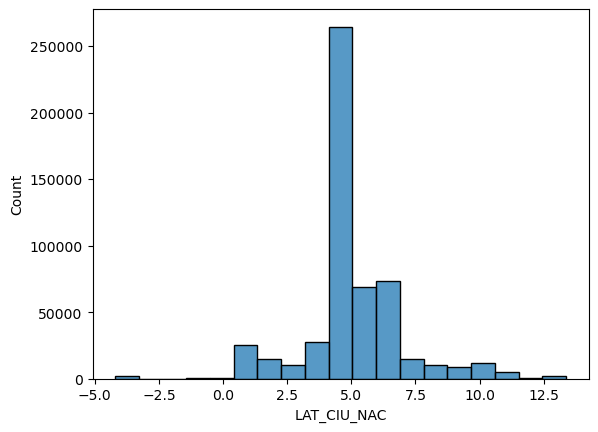

In [54]:
sns.histplot(data=latMAt,x="LAT_CIU_NAC",bins=math.ceil(np.ptp(latMAt["LAT_CIU_NAC"]))+1 )

In [53]:
latAsp = aspirantes[aspirantes['LAT_CIU_NAC']>-20]

<AxesSubplot:xlabel='LAT_CIU_NAC', ylabel='Count'>

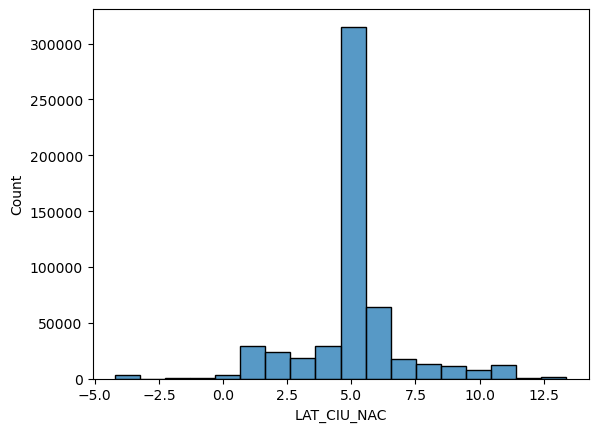

In [55]:
sns.histplot(data=latAsp,x="LAT_CIU_NAC",bins=math.ceil(np.ptp(latAsp["LAT_CIU_NAC"])) )

En los atributos categoricos `'AREAC_SNIES', 'AREA_CINE', 'CIU_NAC', 'CODS_NAC', 'DEP_NAC', 'ESTRATO', 'NACIONALIDAD', 'NIVEL', 'PAES', 'PEAMA', 'PROGRAMA', 'SEXO', 'TIPO_NIVEL'`

En este caso vale la pena hacer el analisis a `CIU_NAC`, `DEP_NAC`,`ESTRATO`,`NACIONALIDAD`,`NIVEL`,`PAES`,`PEAMA`,`PROGRAMA`,`SEXO`,`TIPO_NIVEL`

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

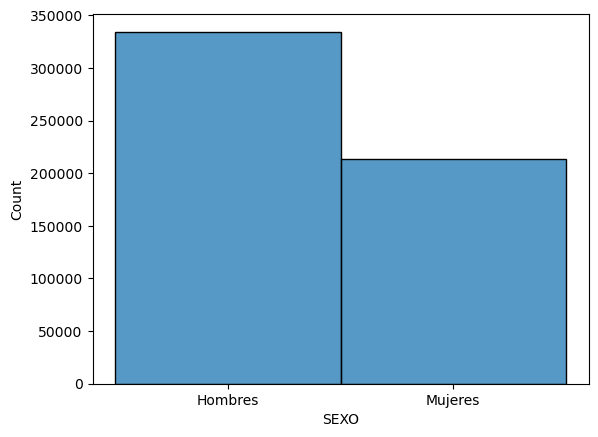

In [56]:
sns.histplot(data=matriculados,x="SEXO")

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

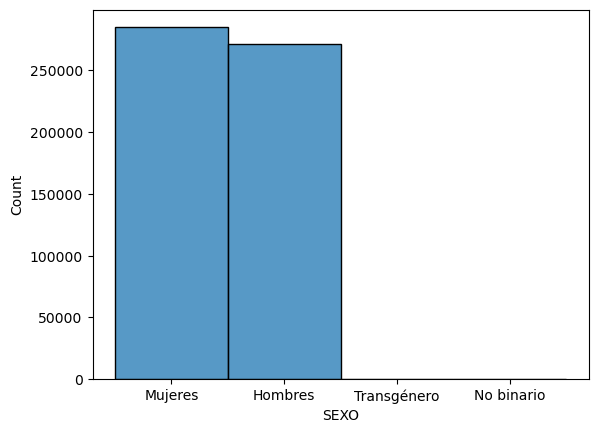

In [57]:
sns.histplot(data=aspirantes,x="SEXO")

In [69]:
aspirantes[(~aspirantes['SEXO'].isin(['Hombres', 'Mujeres'])) & (aspirantes["TIPO_NIVEL"]=="Pregrado")]

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,COD_DEP_NAC,CIU_NAC,COD_CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,...,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
401843,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,ENVIGADO,5266,-75.583191,6.166662,...,526.398,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
402655,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,572.769,Sí,16919,Artes Plásticas,Bellas artes,2,213,Artes y humanidades,No aplica,No aplica
402710,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,535.398,Sí,115,Historia,Ciencias sociales y humanas,2,222,Artes y humanidades,No aplica,No aplica
404340,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,498.433,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
404439,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,442.487,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547778,2024,1,Pregrado,Pregrado,VAUPÉS,97,MITÚ,97001,-70.234960,1.251171,...,440.318,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
548141,2024,1,Pregrado,Pregrado,ANTIOQUIA,5,CHIGORODÓ,5172,-76.681565,7.666156,...,-89.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
549259,2024,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,-89.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
549806,2024,1,Pregrado,Pregrado,CALDAS,17,MANIZALES,17001,-75.490415,5.057051,...,405.604,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica


In [70]:
asp_BinSex = aspirantes[aspirantes['SEXO'].isin(['Hombres', 'Mujeres'])]

In [72]:
asp_BinSex.shape

(556669, 40)

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

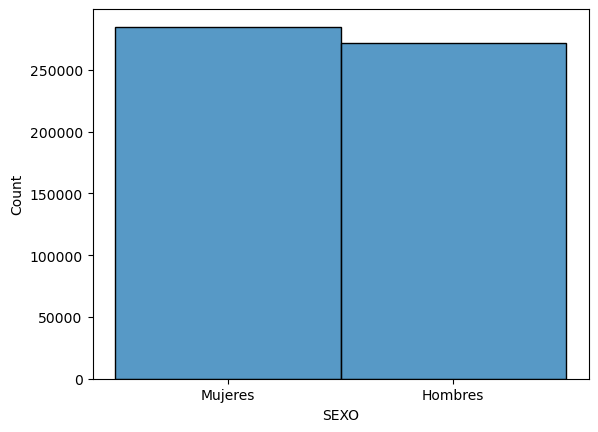

In [71]:
sns.histplot(data=asp_BinSex,x="SEXO")

# Clasificacion

# Inferencia

## SEXO (Binario)

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

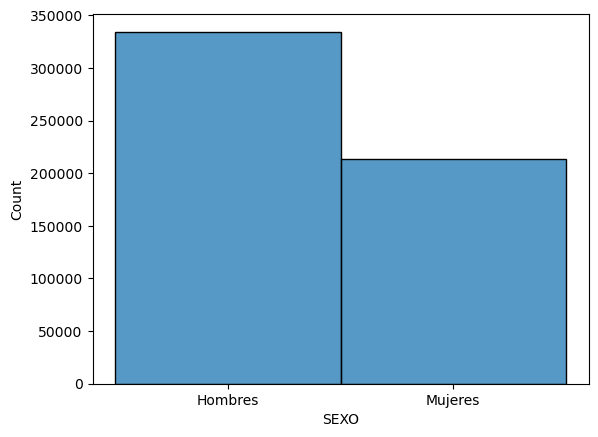

In [76]:
sns.histplot(data=matriculados,x="SEXO")

In [75]:
asp_BinSex = aspirantes[aspirantes['SEXO'].isin(['Hombres', 'Mujeres'])]

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

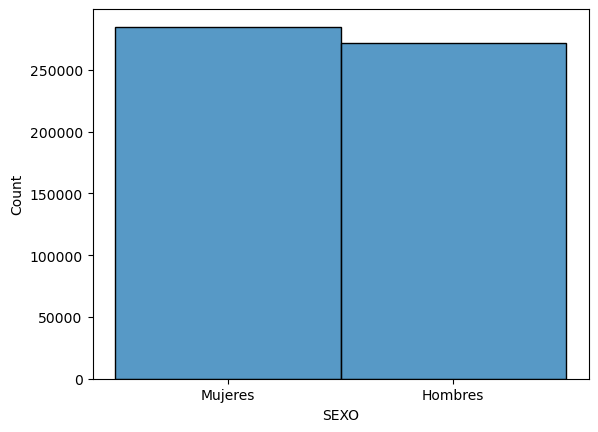

In [73]:
sns.histplot(data=asp_BinSex,x="SEXO")

In [78]:
nMat = matriculados.shape[0]
nAsp = asp_BinSex.shape[0]
print(f'la cantidad de estudiantes matriculados es de {nMat} y la de aspirantes es {nAsp}')



la cantidad de estudiantes matriculados es de 548189 y la de aspirantes es 556669


para esto tomaremos las poblaciones como bernoulli y el exito del experimento aleatorio sera ser mujer, de esta manera las proporciones son:

In [81]:
propMat = (matriculados[matriculados["SEXO"]=="Mujeres"].shape[0])/nMat
propAsp = (asp_BinSex[asp_BinSex["SEXO"]=="Mujeres"].shape[0])/nAsp

In [82]:
print(f'las estimaciones puntuales de las proporciones de mujeres respecto al total son de {propMat} para los matriculados y de {propAsp} para los aspirantes')

las estimaciones puntuales de las proporciones de mujeres respecto al total son de 0.38995310011693046 para los matriculados y de 0.5120385722934095 para los aspirantes


In [83]:
print(f'Y la estimacion puntual de la diferencia de las proporciones es de {propAsp - propMat}')

Y la estimacion puntual de la diferencia de las proporciones es de 0.12208547217647908


Metodo preferido Bootstrap o intervalos de confianza.
Si se sabe la distribucion se prioriza el uso de intervalos de confianza
